<a href="https://colab.research.google.com/github/MairManson/Bikesharing/blob/main/monthly_member_rides_pmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Dependencies
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from fbprophet import Prophet
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data
data = '/content/drive/MyDrive/Colab Notebooks/member_rides.csv'
#df_train= pd.read_csv(data)
#file_path = Path('./Resources/Data/member_rides.csv')
member_rides_df = pd.read_csv(data)
member_rides_df.head(10)

,ds,y
0,2010-09-20 11:27:04,1
1,2010-09-20 11:41:22,1
2,2010-09-20 12:05:37,1
3,2010-09-20 12:06:05,1
4,2010-09-20 12:10:43,1
5,2010-09-20 12:14:27,1
6,2010-09-20 12:15:26,1
7,2010-09-20 12:16:36,1
8,2010-09-20 12:18:38,1
9,2010-09-20 12:19:46,1


In [4]:
member_rides_df.dtypes

ds    object
y      int64
dtype: object

In [5]:
member_rides_df['y'].value_counts()

1    22126756
0     6269130
Name: y, dtype: int64

In [6]:
# Remove 'Casual-0' from 'y' column
member_rides_df = member_rides_df[member_rides_df.y != 0]

In [7]:
member_rides_df['y'].value_counts()

1    22126756
Name: y, dtype: int64

In [8]:
# Convert 'ds' object to datetime data type
member_rides_df['ds'] = pd.to_datetime(member_rides_df['ds'])

In [9]:
member_rides_df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [10]:
# Create Monthly bins
#df1 = df.resample('M', on='Date').sum()  --- https://www.youtube.com/watch?v=l4dvMiSDBzs
memberxmonth_df = member_rides_df.resample('M', on='ds').sum()

In [11]:
memberxmonth_df.head(5)

,y
ds,
2010-09-30,2704
2010-10-31,24992
2010-11-30,38270
2010-12-31,25620
2011-01-31,34438


In [12]:
# Create new column from 'index' --- https://datatofish.com/index-to-column-pandas-dataframe/
memberxmonth_df.reset_index(inplace=True)
memberxmonth_df = memberxmonth_df.rename(columns = {'ds':'ds'})
memberxmonth_df.head(8)

,ds,y
0,2010-09-30,2704
1,2010-10-31,24992
2,2010-11-30,38270
3,2010-12-31,25620
4,2011-01-31,34438
5,2011-02-28,41326
6,2011-03-31,50382
7,2011-04-30,70781


In [27]:
memberxmonth_df.shape

(128, 2)

In [13]:
memberxmonth_df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [25]:
 # Creating two dataframes train and test
pre2019 = memberxmonth_df[memberxmonth_df['ds'] <= '2019-01-31']
pre2019.head(5) 

,ds,y
0,2010-09-30,2704
1,2010-10-31,24992
2,2010-11-30,38270
3,2010-12-31,25620
4,2011-01-31,34438


In [26]:
pre2019.shape 

(101, 2)

In [28]:
#creating the train data frame
train = pre2019[pre2019['ds'] <= '2016-12-31']
train.head(5)

,ds,y
0,2010-09-30,2704
1,2010-10-31,24992
2,2010-11-30,38270
3,2010-12-31,25620
4,2011-01-31,34438


In [29]:
train.shape

(76, 2)

In [31]:
#creating the test data frame
test = pre2019[pre2019['ds'] >= '2016-12-31']

In [32]:
test.shape

(26, 2)

In [33]:
test

,ds,y
75,2016-12-31,147271
76,2017-01-31,152934
77,2017-02-28,182281
78,2017-03-31,193219
79,2017-04-30,241750
80,2017-05-31,241914
81,2017-06-30,279723
82,2017-07-31,258919
83,2017-08-31,280687
84,2017-09-30,285589


In [34]:
# Instantiate and fit the Prophet model *** with weekly seasonality
m = Prophet(interval_width=0.95, weekly_seasonality=True) 
model = m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [77]:
future_data = model.make_future_dataframe(periods=36, freq='m')
future_data.tail()

,ds
107,2019-08-31
108,2019-09-30
109,2019-10-31
110,2019-11-30
111,2019-12-31


In [78]:
forecast_data = model.predict(future_data)

In [79]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
107,2019-08-31,320602.686446,284655.893822,360983.033862
108,2019-09-30,314376.413053,274082.278183,353085.141084
109,2019-10-31,308129.308216,267130.120203,346442.925017
110,2019-11-30,270423.054264,229325.642257,310868.124986
111,2019-12-31,262783.587835,223756.513776,303184.111003


In [68]:
forecast_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-30,50614.106168,36099.871050,109433.290989,50614.106168,50614.106168,21787.677924,21787.677924,21787.677924,1614.880012,1614.880012,1614.880012,20172.797912,20172.797912,20172.797912,0.0,0.0,0.0,72401.784091
1,2010-10-31,54438.371318,15226.605171,89080.014095,54438.371318,54438.371318,-1024.408935,-1024.408935,-1024.408935,-16348.797767,-16348.797767,-16348.797767,15324.388831,15324.388831,15324.388831,0.0,0.0,0.0,53413.962382
2,2010-11-30,58139.273076,5403.655386,79378.926965,58139.273076,58139.273076,-15067.040465,-15067.040465,-15067.040465,5692.653702,5692.653702,5692.653702,-20759.694166,-20759.694166,-20759.694166,0.0,0.0,0.0,43072.232611
3,2010-12-31,61963.538226,-22584.657812,49711.076454,61963.538226,61963.538226,-48548.359531,-48548.359531,-48548.359531,2225.767552,2225.767552,2225.767552,-50774.127083,-50774.127083,-50774.127083,0.0,0.0,0.0,13415.178695
4,2011-01-31,65787.803377,-22932.049710,54854.164073,65787.803377,65787.803377,-51704.475007,-51704.475007,-51704.475007,9127.635929,9127.635929,9127.635929,-60832.110936,-60832.110936,-60832.110936,0.0,0.0,0.0,14083.328370


In [69]:
print(type(forecast_data))

<class 'pandas.core.frame.DataFrame'>


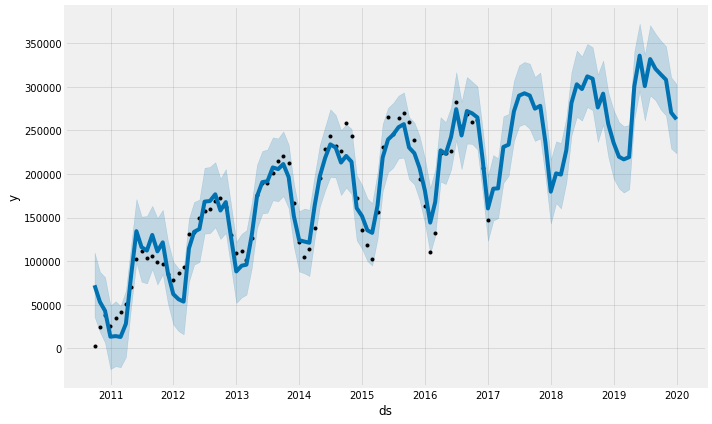

In [80]:
forecast_fig = model.plot(forecast_data)

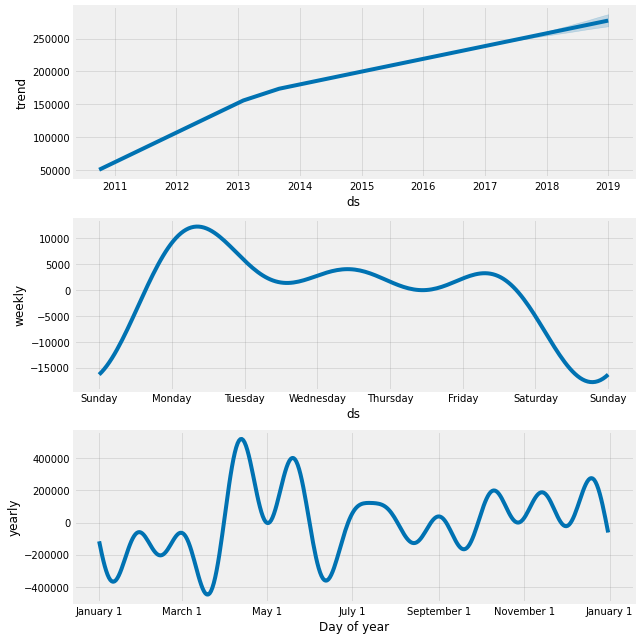

In [71]:
# Decompose outputs
fig2 = model.plot_components(forecast_data)

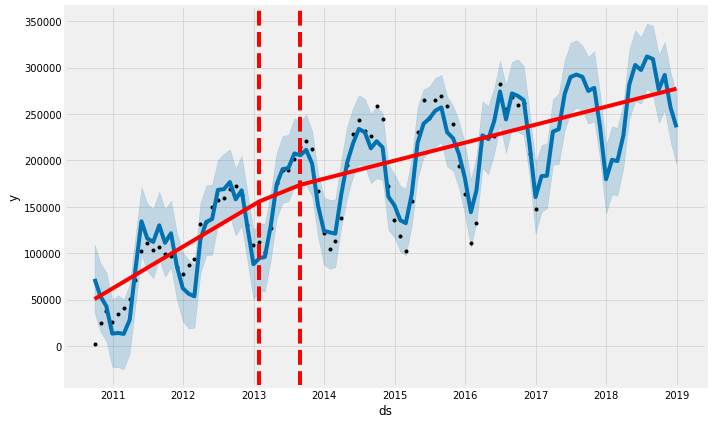

In [72]:
# Plot changepoints
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), m, forecast_data)

In [73]:
deltas = m.params['delta'].mean(0)
deltas

array([ 1.66504350e-10, -6.47141535e-09, -5.19295781e-09,  3.53608305e-09,
        1.62193073e-09, -4.14094642e-06, -5.04226629e-04, -5.08462850e-05,
       -3.49783601e-04, -3.76023697e-04, -4.04015034e-04, -3.14815205e-01,
       -5.27524826e-04, -9.17039892e-04, -2.47687142e-01, -3.34832343e-04,
       -2.14815298e-04, -3.31399388e-04, -6.64771908e-04, -7.53802890e-04,
       -1.17908156e-05, -3.36580066e-04, -3.84423491e-05, -1.69730509e-07,
       -6.86175459e-09])

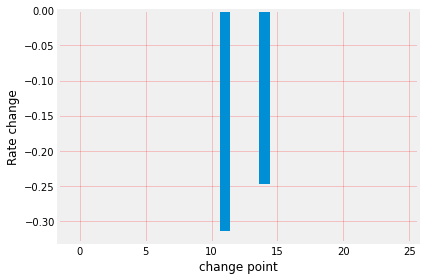

In [74]:
# Plot changepoint changes
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='red', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('change point')
fig.tight_layout()

In [75]:
# Cross Validation
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation(model=m, initial='366', horizon='180 days')
cv_results.head()

INFO:fbprophet:Making 24 forecasts with cutoffs between 2010-11-03 00:00:00 and 2016-07-04 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-11-30,-26638.873485,-26638.873871,-26638.873052,38270,2010-11-03
1,2010-12-31,-133408.271126,-133408.272301,-133408.269857,25620,2010-11-03
2,2011-01-31,-76118.070188,-76118.072211,-76118.067924,34438,2010-11-03
3,2011-02-28,-108112.410265,-108112.413135,-108112.407191,41326,2010-11-03
4,2011-03-31,-161789.207781,-161789.211849,-161789.203471,50382,2010-11-03


In [76]:
# Performance Metrics
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,19 days,5.123232e+11,715767.561638,288978.437056,2.901775,0.092065,0.285714
1,20 days,5.069186e+11,711982.128163,273959.844467,2.736444,0.092065,0.285714
2,21 days,2.540747e+11,504058.201068,148273.371893,1.447998,0.076374,0.357143
3,23 days,1.240705e+09,35223.642126,23059.847931,0.161732,0.066094,0.428571
4,25 days,1.617250e+09,40215.043868,27339.757603,0.202469,0.066094,0.500000
...,...,...,...,...,...,...,...
98,174 days,3.517292e+10,187544.442086,91825.520171,0.555270,0.280607,0.071429
99,175 days,2.455689e+09,49554.910861,45237.878948,0.282787,0.257966,0.142857
100,176 days,2.075191e+09,45554.266313,40492.799848,0.241963,0.227265,0.214286
101,178 days,1.695701e+10,130219.071357,66831.133008,0.656764,0.182590,0.285714
